# Perform Principal component analysis and perform clustering using first 
### 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
### optimum number of clusters and check whether we have obtained same number of clusters with the original data 
### (class column we have ignored at the begining who shows it has 3 clusters)df

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import silhouette_score as sil
import warnings
warnings.filterwarnings('ignore')
!pip install plotly

In [2]:
df = pd.read_csv('wine.csv')

In [3]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.tail()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [5]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df2 = df.drop(["Type"],axis=1)

In [9]:
df2

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Boxplot

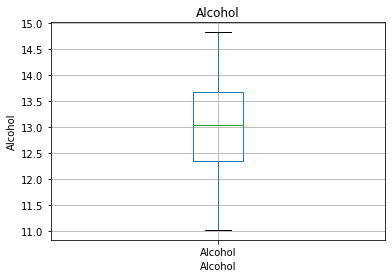

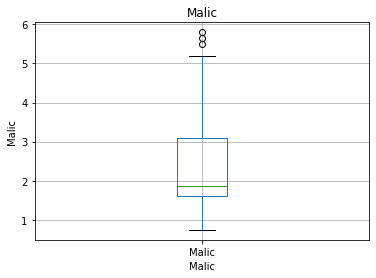

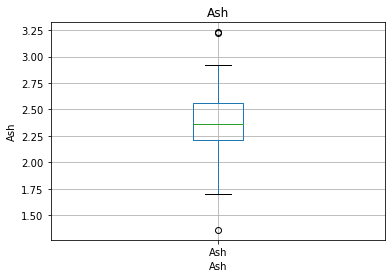

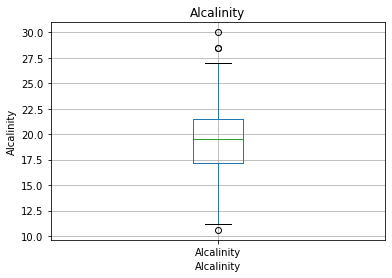

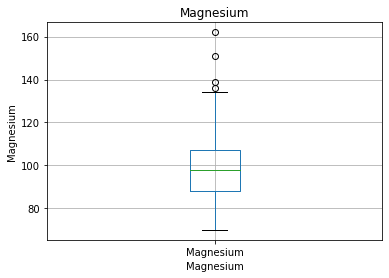

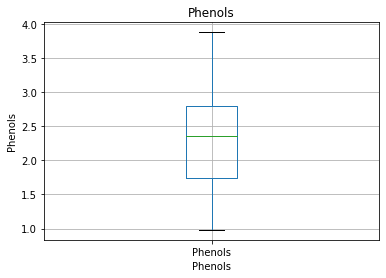

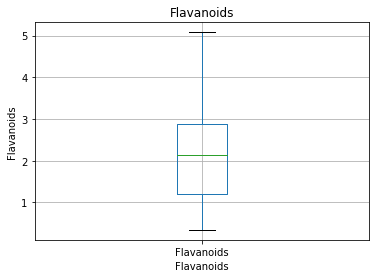

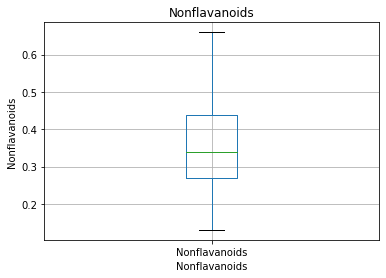

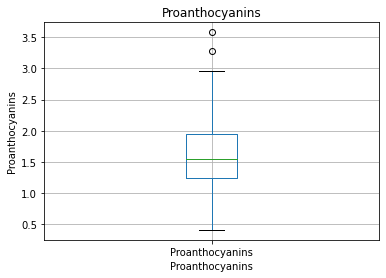

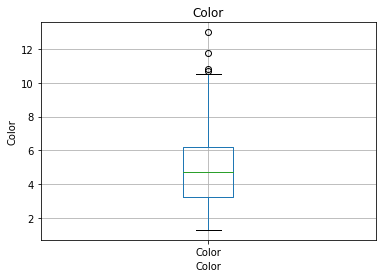

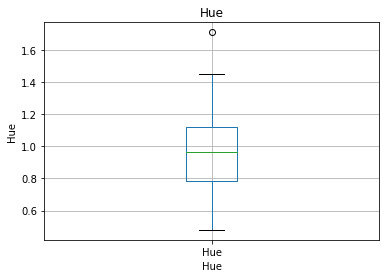

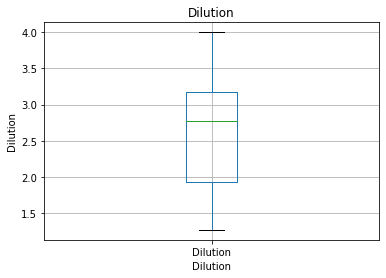

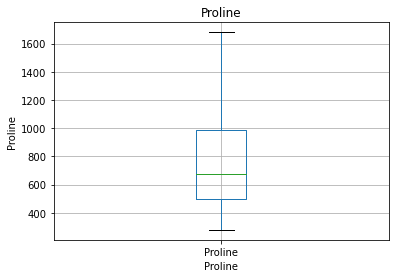

In [10]:
for feature in df2:
    data = df2.copy()
    data.boxplot(column=feature)
    plt.xlabel(feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

# Observation:
we can see some outliers in the data set.

# Visualization Data Using Histogram

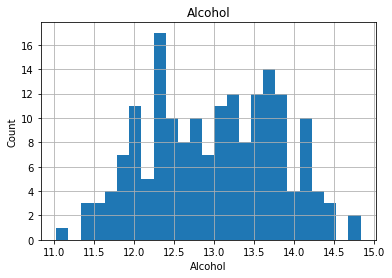

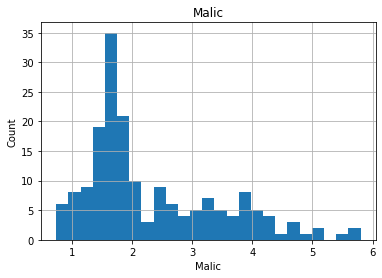

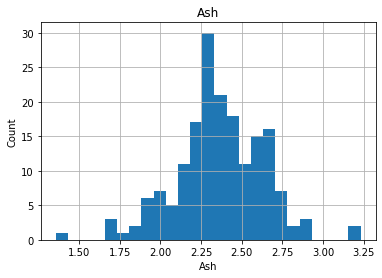

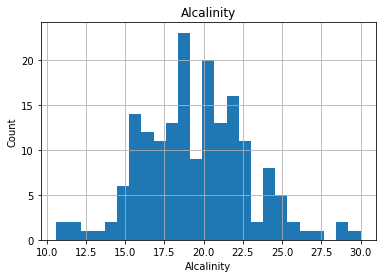

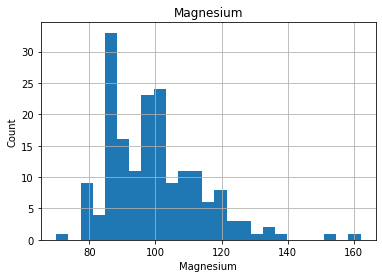

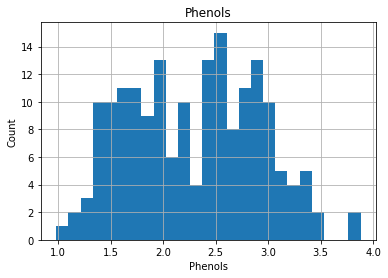

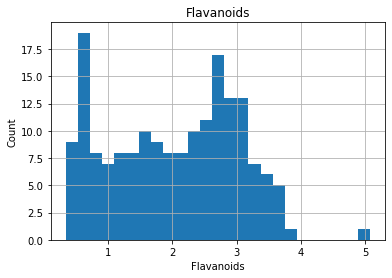

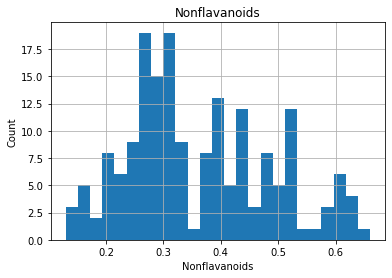

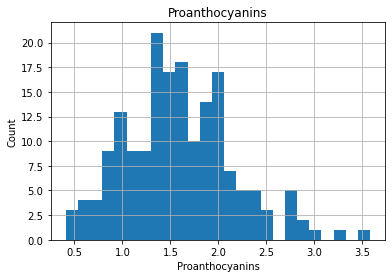

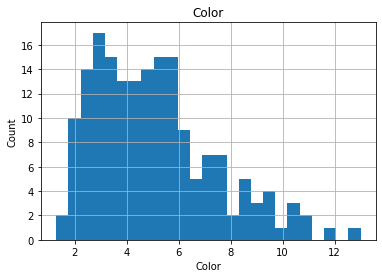

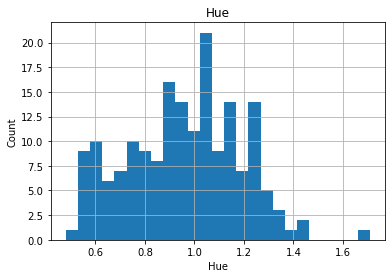

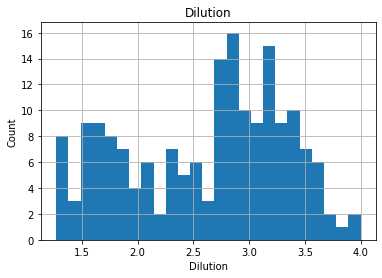

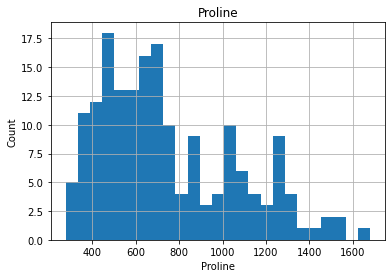

In [11]:
for feature in df2:
    data = df2.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


# Transformation of data 

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [13]:
df_std = sc.fit_transform(df2.iloc[:,0:])

In [14]:
df_std

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# Doing PCA On Standardized Data

In [15]:
from sklearn.decomposition import PCA
import plotly.express as px
pca = PCA()

In [16]:
pca_std = df_std

In [17]:
pca = PCA(n_components=13)
pca_values = pca.fit_transform(pca_std)

In [18]:
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [19]:
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [20]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

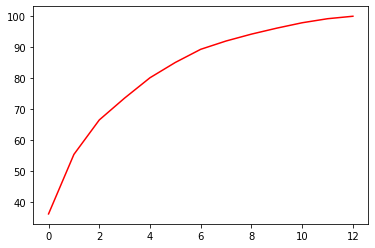

In [21]:
plt.plot(var1,color="red")

In [22]:
pca_values[:,0:3]

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [23]:
pca_std_df = pd.DataFrame(pca_values[:,0:3],columns=['PCA1',"PCA2",'PCA3'])
pca_std_df

,PCA1,PCA2,PCA3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


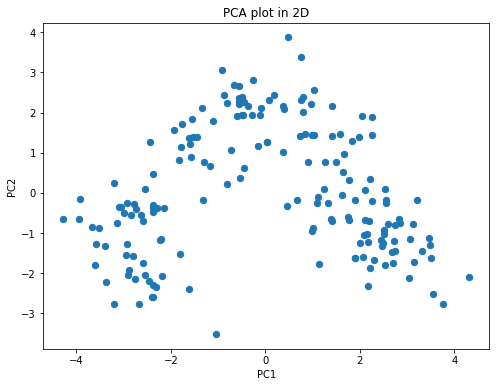

In [24]:
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Hierarchical clustering

In [25]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from sklearn.manifold import TSNE

# Dendrogram using Complete Linkage

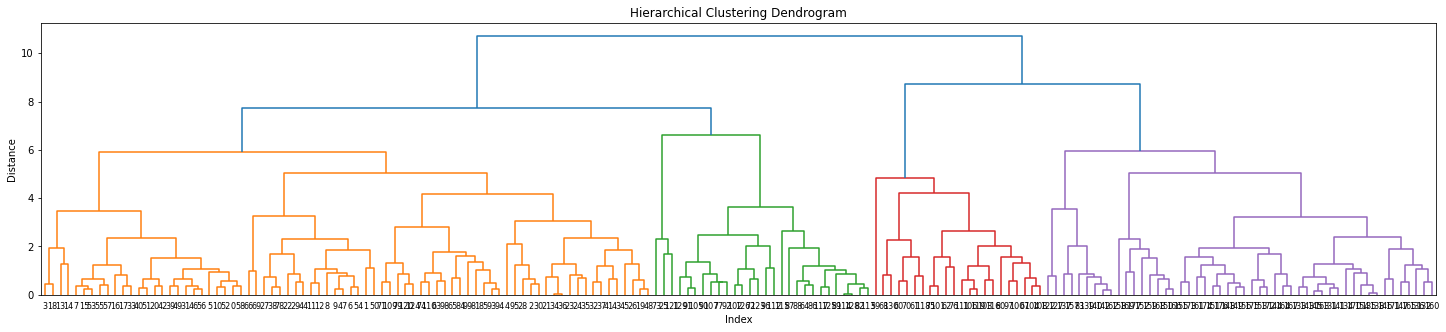

In [26]:
z = linkage(pca_std_df, method="complete",metric="euclidean")

plt.figure(figsize=(25, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0., 
    leaf_font_size=8., 
)
plt.show()

# Dendrogram Using Single Linkage

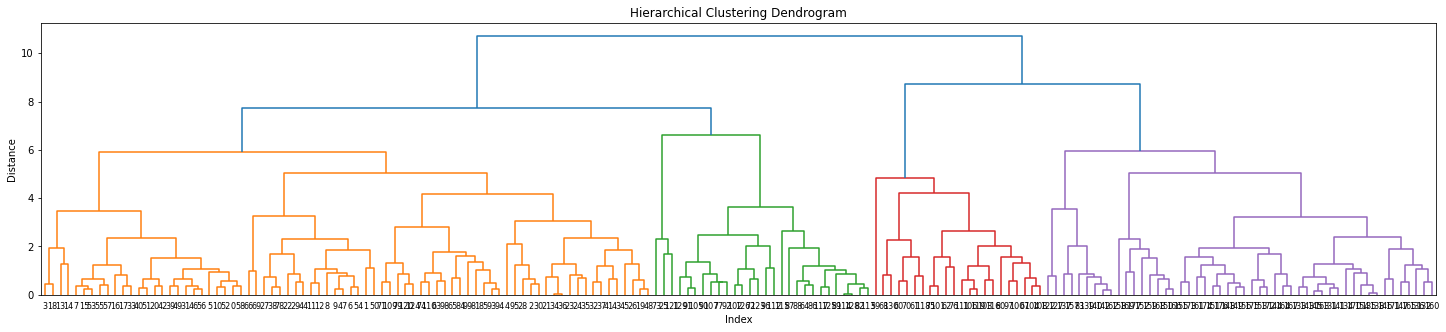

In [27]:
z1 = linkage(pca_std_df, method="single",metric="euclidean")

plt.figure(figsize=(25, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0., 
    leaf_font_size=8., 
)
plt.show()

# Dendrogram using Average Linkage

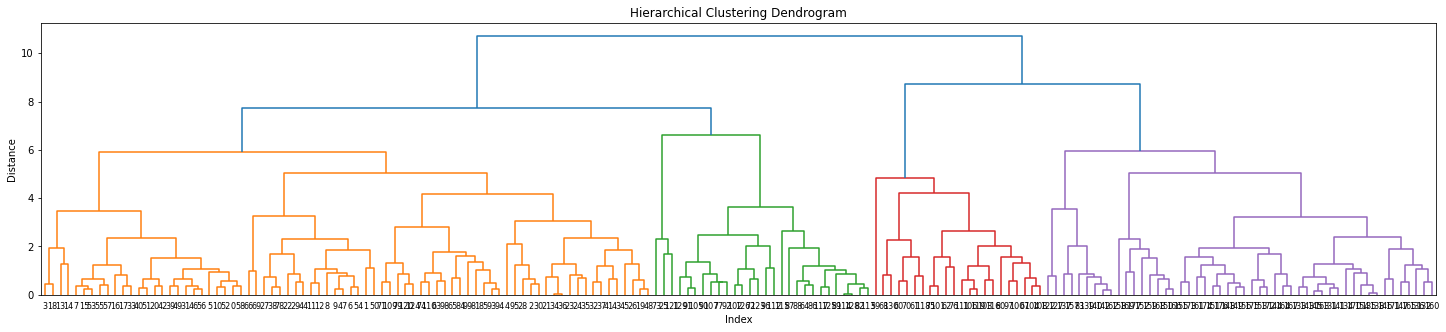

In [28]:
z2 = linkage(pca_std_df, method="average",metric="euclidean")

plt.figure(figsize=(25, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0., 
    leaf_font_size=8., 
)
plt.show()

# Observation:
We can see that all the three linkage i.e Complete,Single and Average are showing 3 clusters

# Silhouette Score for Hierarchical

In [29]:
n_clusters = [2,3,4,5,6,7,8]  

for n_clusters in n_clusters:
    for linkages in ["complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages)
        hie_labels1 = hie_cluster1.fit_predict(pca_std_df)
        silhouette_score1 = sil(pca_std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- complete : 0.32546865442450873
For n_clusters = 2 The average silhouette_score with linkage- average : 0.3631067305104137
For n_clusters = 2 The average silhouette_score with linkage- single : 0.3631067305104137

For n_clusters = 3 The average silhouette_score with linkage- complete : 0.28750089351606356
For n_clusters = 3 The average silhouette_score with linkage- average : 0.38672545200747743
For n_clusters = 3 The average silhouette_score with linkage- single : 0.21662871644125722

For n_clusters = 4 The average silhouette_score with linkage- complete : 0.35784842685673074
For n_clusters = 4 The average silhouette_score with linkage- average : 0.321731313111977
For n_clusters = 4 The average silhouette_score with linkage- single : 0.13616086412144995

For n_clusters = 5 The average silhouette_score with linkage- complete : 0.3558447987963536
For n_clusters = 5 The average silhouette_score with linkage- average : 0.4465449

# Observation:
After validation of clustering we can see that after 3 cluster there is an significant changes

# Hierarchical clustering using complete linkage method

In [30]:
hc = AgglomerativeClustering(n_clusters = 3,affinity = 'euclidean',linkage = "complete")

In [31]:
y_hc = hc.fit_predict(pca_std_df)

In [32]:
pca_std_df['clusters'] = y_hc

In [33]:
pca_std_df

,PCA1,PCA2,PCA3,clusters
0,3.316751,-1.443463,-0.165739,0
1,2.209465,0.333393,-2.026457,0
2,2.516740,-1.031151,0.982819,0
3,3.757066,-2.756372,-0.176192,0
4,1.008908,-0.869831,2.026688,0
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1
174,-2.601956,-1.757229,0.207581,1
175,-2.677839,-2.760899,-0.940942,1
176,-2.387017,-2.297347,-0.550696,1


In [34]:
pca_std_df.iloc[:,0:].groupby(['clusters']).mean().apply(lambda x: tuple(x))

,PCA1,PCA2,PCA3
clusters,,,
0,1.379516,0.140081,0.252432
1,-2.717994,-1.149057,-0.022672
2,-0.469499,1.936559,-1.164734


In [35]:
pca_std_df.iloc[:,0:].groupby(['clusters']).count().apply(lambda x: tuple(x))

,PCA1,PCA2,PCA3
clusters,,,
0,106,106,106
1,50,50,50
2,22,22,22


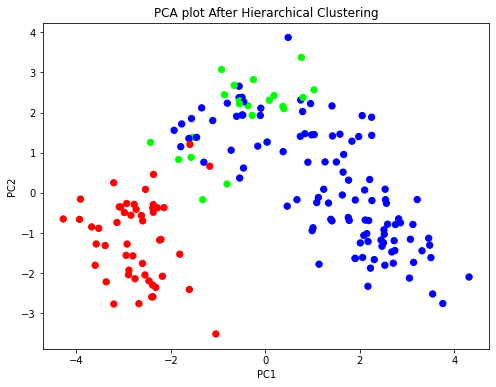

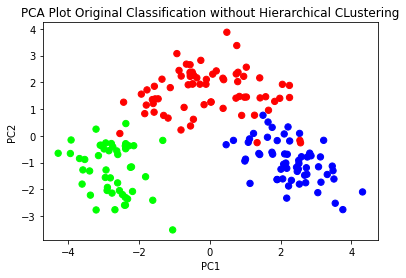

In [36]:
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c=pca_std_df['clusters'], cmap="brg", s=40)


# Aesthetics
plt.title('PCA plot After Hierarchical Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


# Scatterplot
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c=df['Type'], cmap="brg", s=40)

# Aesthetics
plt.title('PCA Plot Original Classification without Hierarchical CLustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


# Observation :
As we can see in the first plot after doing pca in hierarchical clustering the blue cluster and cluster are trying to become as an one cluster because its dimension has been reduced as compared to orignal clustering without doing pca

# TSNE

In [37]:
# t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(df_std)

# Convert to data frame
tsne_df = pd.DataFrame(data = X_tsne, columns = ['tsne comp. 1', 'tsne comp. 2'])

# Shape and preview
print(tsne_df.shape)
tsne_df.head()

(178, 2)


,tsne comp. 1,tsne comp. 2
0,-9.940681,7.755867
1,-6.783883,6.893185
2,-6.501447,11.854688
3,-9.710310,10.787611
4,-2.473018,10.104362


Text(0, 0.5, 'tsne component 2')

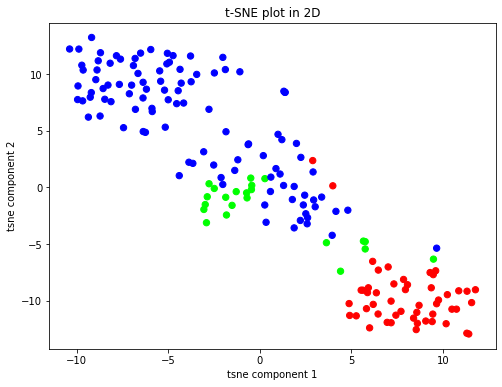

In [38]:
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], c=pca_std_df['clusters'], cmap="brg", s=40)
# Aesthetics
plt.title('t-SNE plot in 2D')
plt.xlabel('tsne component 1')
plt.ylabel('tsne component 2')

# Observation :
As we can see in the first plot after doing pca and visualize in TSNE in hierarchical clustering the blue cluster and cluster are trying to become as an one cluster because its dimension has been reduced as compared to orignal clustering without doing pca

# K-Means Clustering 

In [39]:
from sklearn.cluster import KMeans

In [40]:
pca_std_df.drop('clusters',axis=1,inplace=True)
pca_std_df

,PCA1,PCA2,PCA3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


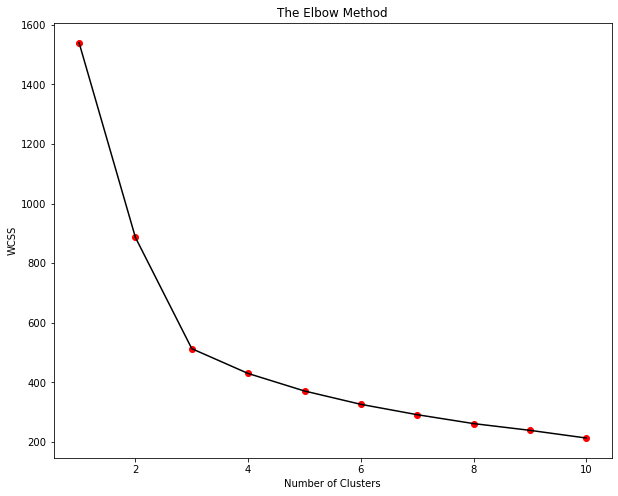

In [41]:
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    clf.fit(pca_std_df)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS

plt.plot(range(1, 11), WCSS,color = 'black')
plt.scatter(range(1,11),WCSS,color = 'red')
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

# Observation:
In elbow method of k-means we can see that they are showing number of clusters is 3 clusters.After 3 clusters the graph look stangnant

In [42]:
clf = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10,  random_state=0)
y_kmeans = clf.fit_predict(pca_std_df)

In [43]:
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [44]:
clf.cluster_centers_

array([[-2.72003575e+00, -1.12565126e+00, -2.39093241e-01],
       [-7.27201401e-02,  1.77754410e+00,  1.92644149e-01],
       [ 2.27580813e+00, -8.94517592e-01, -2.15032202e-03]])

In [45]:
md = pd.Series(y_kmeans)
pca_std_df['Cluster']=md

In [46]:
pca_std_df.iloc[:,0:].groupby(['Cluster']).mean().apply(lambda x: tuple(x))

,PCA1,PCA2,PCA3
Cluster,,,
0,-2.720036,-1.125651,-0.239093
1,-0.072720,1.777544,0.192644
2,2.275808,-0.894518,-0.002150


In [47]:
pca_std_df.iloc[:,0:].groupby(['Cluster']).count().apply(lambda x: tuple(x))

,PCA1,PCA2,PCA3
Cluster,,,
0,51,51,51
1,64,64,64
2,63,63,63


# Silhouette Score for K-Means Clustering

In [48]:
from sklearn.metrics import silhouette_score as sil
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
from yellowbrick.cluster import KElbowVisualizer

model


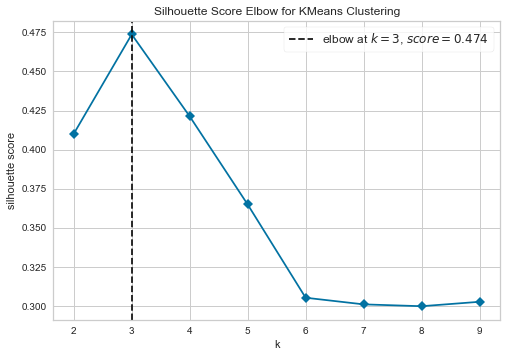

In [49]:
# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10,max_iter=500, n_init=20,)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer1 = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)
# Fit the data and visualize
print('model')
visualizer1.fit(pca_std_df)    
visualizer1.poof()
plt.show()

# observation:
After doing KElbow visaulizer we can they are suggesting to create 3 clusters

For n_clusters = 2 The average silhouette_score is : 0.41006355636147424
For n_clusters = 3 The average silhouette_score is : 0.473756325868891
For n_clusters = 4 The average silhouette_score is : 0.4212559392757375
For n_clusters = 5 The average silhouette_score is : 0.4231329030618378
For n_clusters = 6 The average silhouette_score is : 0.305048923588262
For n_clusters = 7 The average silhouette_score is : 0.30079869810428755
For n_clusters = 8 The average silhouette_score is : 0.3016400748670207
For n_clusters = 9 The average silhouette_score is : 0.3000279896383857


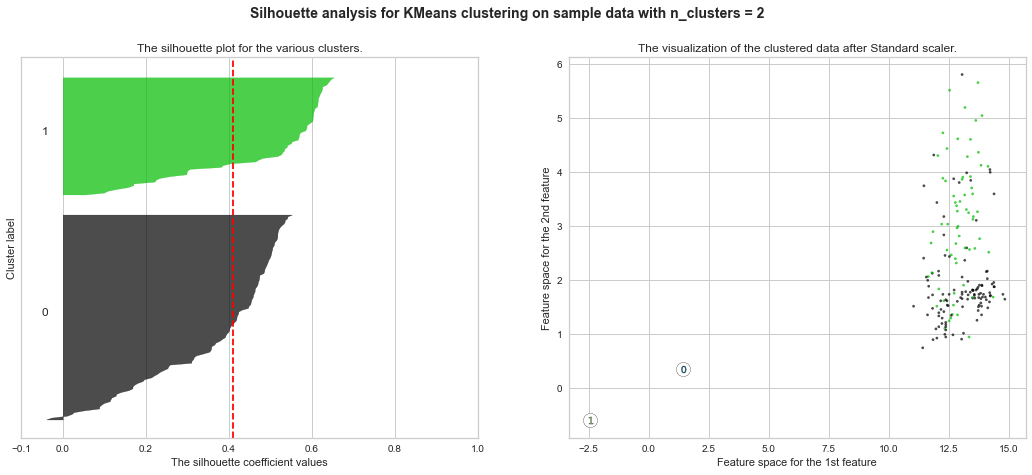

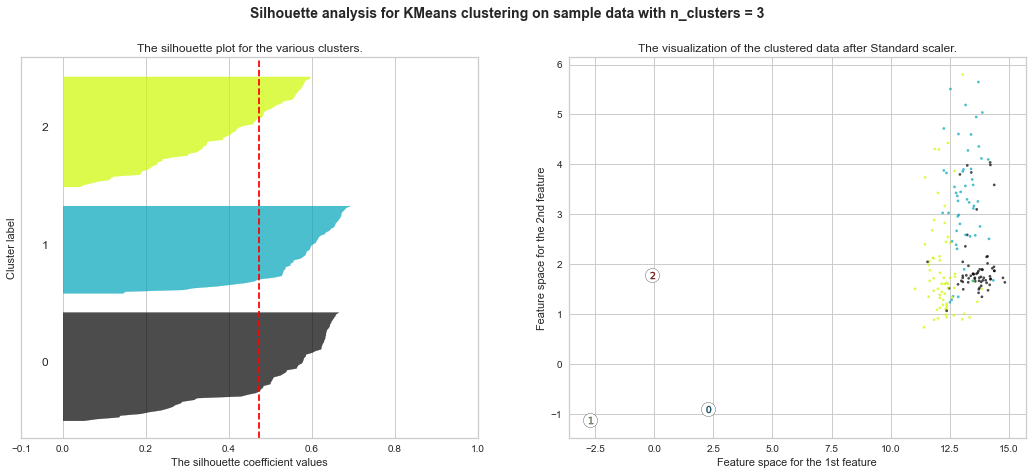

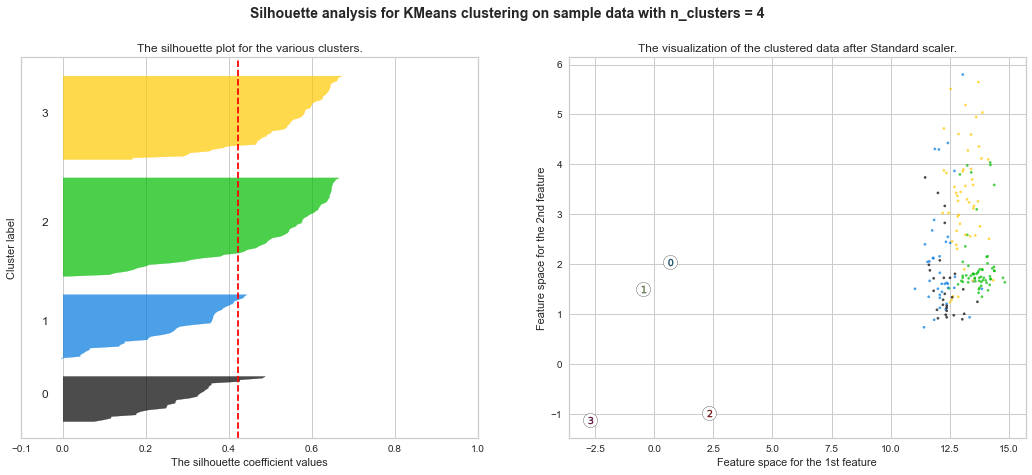

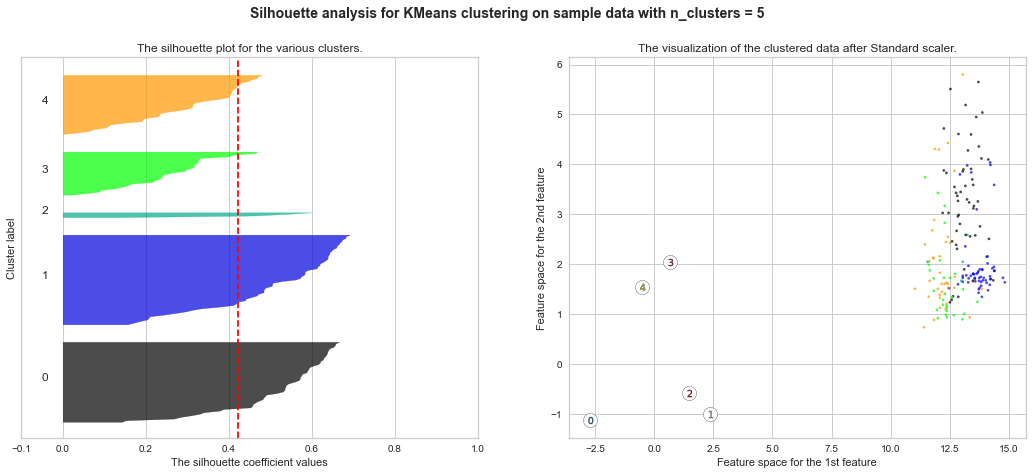

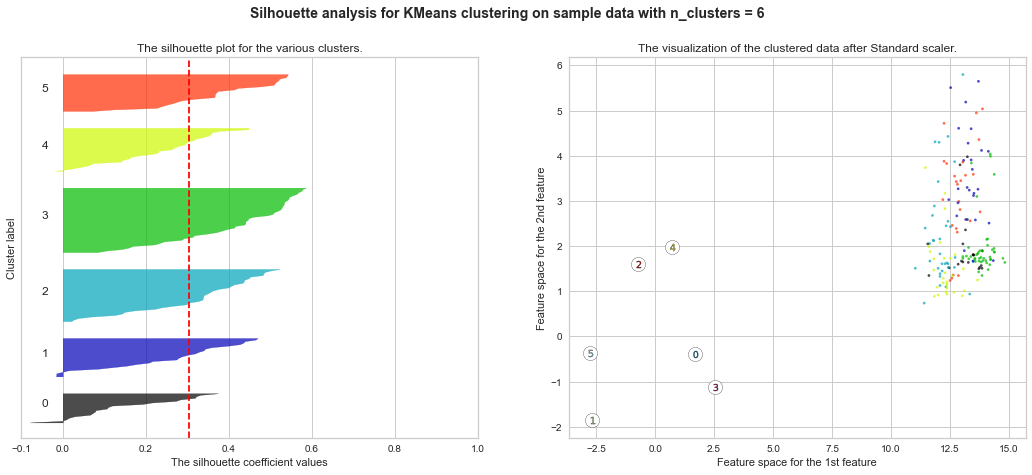

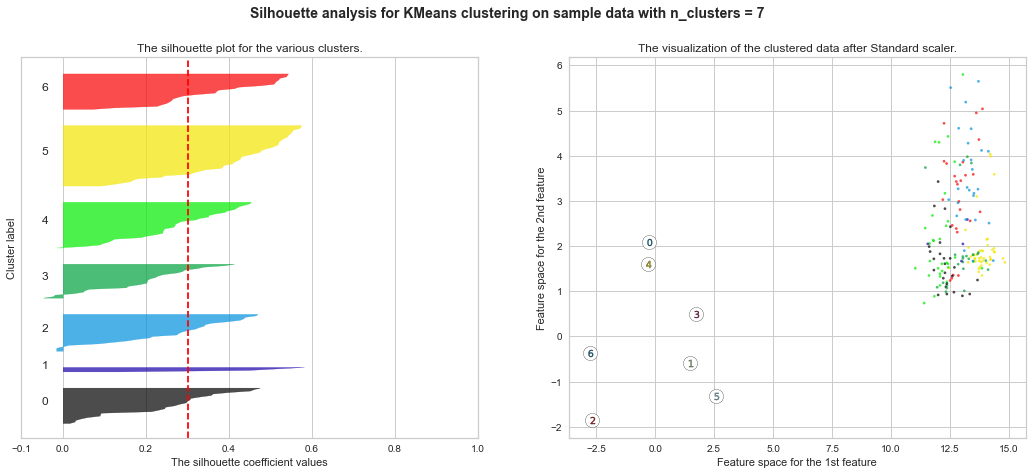

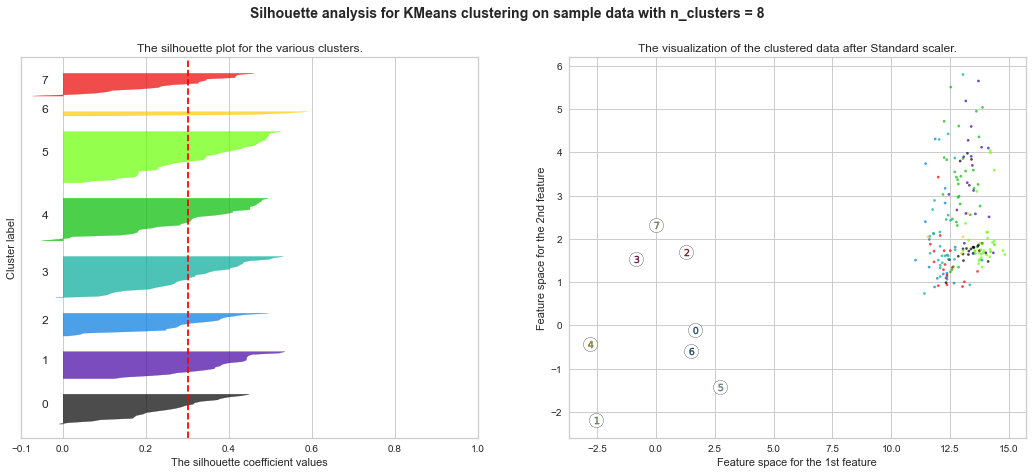

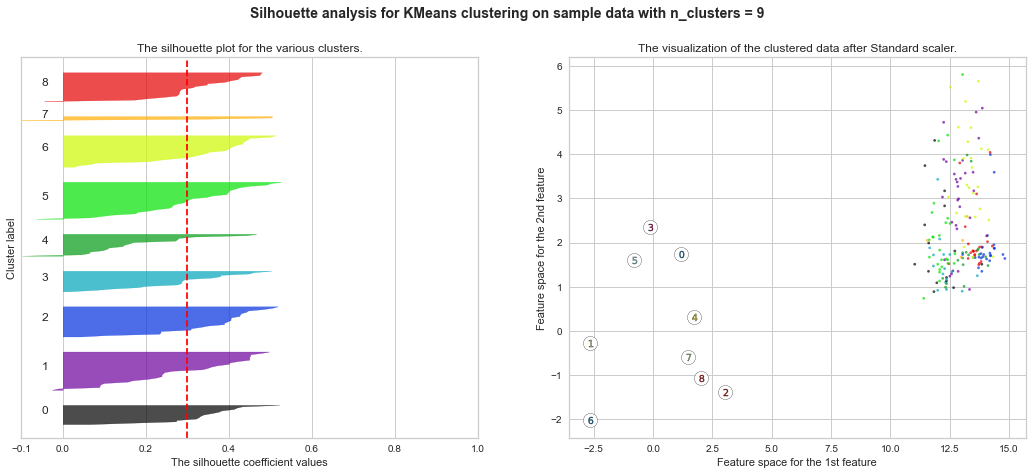

In [50]:
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pca_std_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(pca_std_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sil(pca_std_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_std_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
  # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data.iloc[:,0], data.iloc[:,1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,0], centers[:,1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data after Standard scaler.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


# Observation:
After 3 clusters we can see some outliers in the clusters

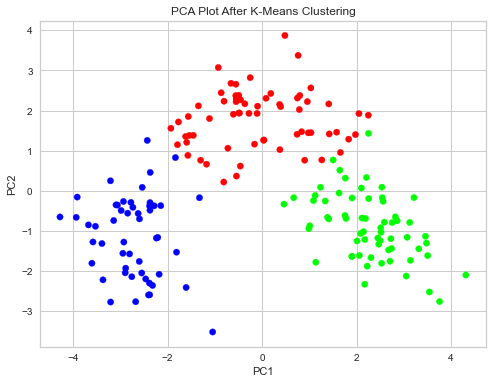

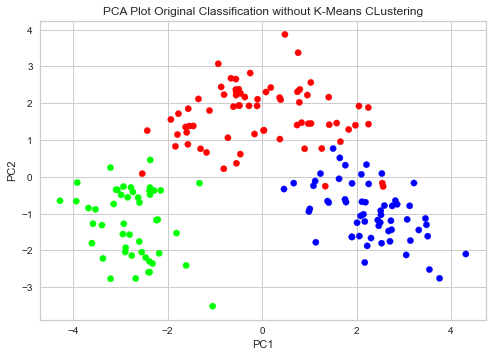

In [51]:
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c=pca_std_df['Cluster'], cmap="brg", s=40)


# Aesthetics
plt.title('PCA Plot After K-Means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Scatterplot
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c=df['Type'], cmap="brg", s=40)

# Aesthetics
plt.title('PCA Plot Original Classification without K-Means CLustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


# Observation:
In k-means Clustering We can see that they are properly differentiate in three clusters as compared to orignal clustering without doing pca

Text(0, 0.5, 'tsne component 2')

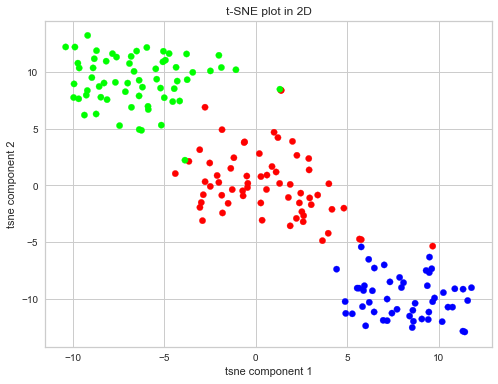

In [52]:
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], c=pca_std_df['Cluster'], cmap="brg", s=40)

# Aesthetics
plt.title('t-SNE plot in 2D')
plt.xlabel('tsne component 1')
plt.ylabel('tsne component 2')

# Observation:
In TSNE also we can that after doing PCA in k-means it properly differentiate the three clusters as compared to hierarchical clustering